# Prepare dataset
Convert target data into X data using the transfer function from the extractor class.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import datetime as dt 
import autograd.numpy as anp
from autograd import grad

c = 299792458  # Speed of light in m/s§

In [3]:
plt.rcParams.update({'font.size': 14})

Definition of transfer theoretical transfer function:  
$\tilde{H}(\omega) = \frac{E_2}{E_1} =   \frac{4 \tilde{n}_1 \tilde{n}_2}{(\tilde{n}_1 + \tilde{n}_2)^2} e^{-i((\tilde{n}_2 - \tilde{n}_1) \frac{wd}{c})}$  
In our case we set $\tilde{n}_1 = 1$ as it is air.  
This gives the theoretical transfer function:  
$\tilde{H}(\omega) =  \frac{4 \tilde{n}}{(\tilde{n} + 1)^2} e^{-i((\tilde{n} - 1) \frac{wd}{c})}$ 

In [4]:
# Use definition as in the Extractor class

def H_th_function(n, w, length):
    '''
    Inputs
    ------
    n: refractive index
    w: frequency of light being propagated
    length: length of the sample we are modelling
    
    outputs
    -------
    returns: output for the transfer function

    Method
    ------
    Equation for transfer function derived from [Input source here]

    '''
    return (4 * n) / ((n + 1) ** 2) * anp.exp(-1j * (n - 1) * w * length/ c)

In [5]:
# define frequency range we want to use
interp = 2**6
freqs_THz = np.linspace(0.1, 5, interp)   # 0-5 THz 
freqs = freqs_THz * 1e12
freqs_ang = freqs * 2 * np.pi

In [6]:
source = pd.read_csv('generated_datasets/dataset_size_20000.csv')
print(f'Source dataframe has {len(source["n"])} rows.')
print(f'This will result in {interp * len(source["n"]):,} data points for training.')
source.head(5)

Source dataframe has 20000 rows.
This will result in 1,280,000 data points for training.


,n,k,d
0,2.10168,-0.044536,0.0005
1,2.30214,-0.020281,0.0005
2,2.44811,-0.052000,0.0005
3,2.01324,-0.051215,0.0005
4,2.86665,-0.027159,0.0005


In [7]:
# Create an expanded DataFrame to hold results
results = []

for _, row in source.iterrows():
    n, k, d = row['n'], row['k'], row['d']
    tf_values = [H_th_function((n+k*1j), f, d) for f in freqs_ang]
    
    # Calculate magnitude and unwrapped phase
    H_values = np.abs(tf_values)
    phi_values = np.unwrap(np.angle(tf_values))
    
    # Append results to list
    for freq, H, phi in zip(freqs_ang, H_values, phi_values):
        results.append({'n': n, 'k': k, 'd': d, 'freq': freq, 'H': H, 'phi': phi})

# Convert to DataFrame
expanded_df = pd.DataFrame(results)

# Display first few rows of the expanded DataFrame
display(expanded_df.head())

,n,k,d,freq,H,phi
0,2.10168,-0.044536,0.0005,6.283185e+11,0.834011,-1.146947
1,2.10168,-0.044536,0.0005,1.117011e+12,0.804280,-2.044873
2,2.10168,-0.044536,0.0005,1.605703e+12,0.775609,-2.942798
3,2.10168,-0.044536,0.0005,2.094395e+12,0.747960,-3.840723
4,2.10168,-0.044536,0.0005,2.583087e+12,0.721296,-4.738648


In [8]:
print(f'DataFrame shape: {expanded_df.shape}')
display(expanded_df.head(65))

DataFrame shape: (1280000, 6)


,n,k,d,freq,H,phi
0,2.10168,-0.044536,0.0005,6.283185e+11,0.834011,-1.146947
1,2.10168,-0.044536,0.0005,1.117011e+12,0.804280,-2.044873
2,2.10168,-0.044536,0.0005,1.605703e+12,0.775609,-2.942798
3,2.10168,-0.044536,0.0005,2.094395e+12,0.747960,-3.840723
4,2.10168,-0.044536,0.0005,2.583087e+12,0.721296,-4.738648
...,...,...,...,...,...,...
60,2.10168,-0.044536,0.0005,2.994985e+13,0.094471,-55.022460
61,2.10168,-0.044536,0.0005,3.043854e+13,0.091104,-55.920385
62,2.10168,-0.044536,0.0005,3.092723e+13,0.087856,-56.818310
63,2.10168,-0.044536,0.0005,3.141593e+13,0.084724,-57.716236


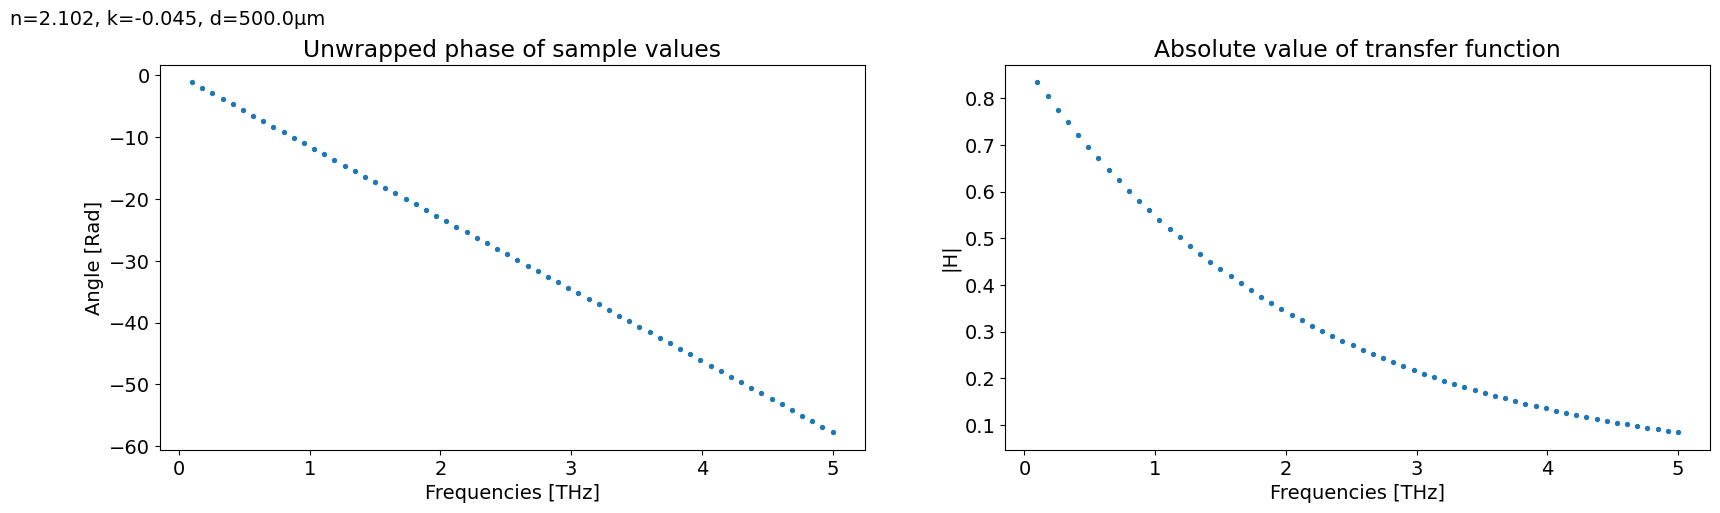

In [9]:
test_sample = expanded_df.head(64)

n_val, k_val, d_val = test_sample.iloc[0][['n', 'k', 'd']]

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(freqs_THz, test_sample['phi'], s=8)
axs[0].set_title('Unwrapped phase of sample values')
axs[0].set_xlabel('Frequencies [THz]')
axs[0].set_ylabel('Angle [Rad]')

axs[1].scatter(freqs_THz, test_sample['H'], s=8)
axs[1].set_title('Absolute value of transfer function')
axs[1].set_xlabel('Frequencies [THz]')
axs[1].set_ylabel('|H|')

# Annotate with n, k, d values
axs[1].set_ylabel('|H|')

# Add a label at the top-left of the entire figure (outside the subplots)
fig.text(0.05, 0.99, f'n={n_val:.3f}, k={k_val:.3f}, d={1e6*d_val:.1f}µm', 
         verticalalignment='top', horizontalalignment='left', 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

plt.show()

In [9]:

# Get the current date and time in a suitable format
timestamp = dt.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
# need to add noise to this data
expanded_df.to_csv(f'training_data/NN_data_{timestamp}.csv', index=False)

In [ ]:
print(f'Range of frequencies: {min(expanded_df["freq"]) * 1e-12} to {max(expanded_df["freq"]) * 1e-12}')

### Add noise to the theoretical transfer function to simulate an experimental transfer function

In [22]:
# TODO: Replace it with real experimental values
#test_sample['exp_H'] = test_sample.apply(lambda x: x['H'] + np.random.normal(0, 0.01), axis=1)
#test_sample['exp_phi'] = test_sample.apply(lambda x: x['phi'] + np.random.normal(0, 0.01), axis=1)

test_sample.loc[:, 'exp_H'] = test_sample['H'] + np.random.normal(0, 0.01, size=len(test_sample))
test_sample.loc[:, 'exp_phi'] = test_sample['phi'] + np.random.normal(0, 0.01, size=len(test_sample))

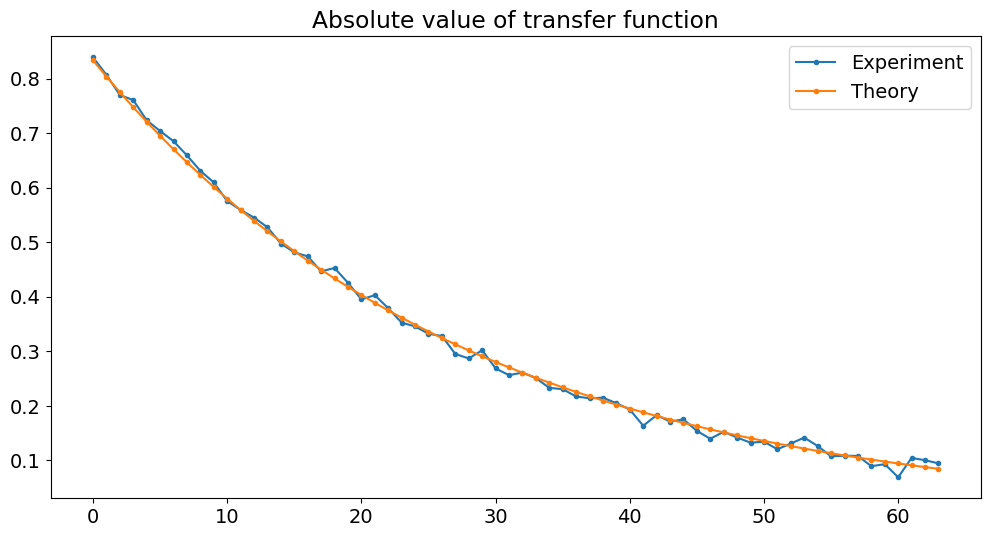

In [23]:
fig = plt.figure(figsize=(12,6))
plt.title('Absolute value of transfer function')
plt.plot(test_sample['exp_H'], ".-", label = "Experiment")
plt.plot(test_sample['H'], ".-", label = "Theory")
plt.legend()
plt.show()

In [12]:
# Define some loss functions
# TODO: Understand the contribution of each loss function to the total loss (last step in our analysis)

In [13]:
def abs_tf_loss(H_exp, H):
    return np.mean(np.abs(H_exp - H))

def phase_tf_loss(phase_exp, phase):
    return np.mean(np.abs(phase_exp - phase))

def loss(H_exp, H, phase_exp, phase):
    return abs_tf_loss(H_exp, H) + phase_tf_loss(phase_exp, phase)

In [15]:
# Create a "training" loop
# Currently it only tries some values

In [18]:
# TODO: Apply backpropagation and update the values of n, k, and d by minimizing the loss function

n0, k0, d0 = 2.0, -0.05, 0.0004 # Initial guesses  ( our trainable parameters )

min_loss = np.inf
best_params = {'n': 0, 'k': 0, 'd': 0}
for ii in range(3):
    n = n0 + ii*0.01
    for ij in range(3):
        k = k0 + ij*0.005
        for ik in range(3):
            d = d0 + ik*0.0001
            # Calculate the transfer function for the given n, k, and d
            tf_values = [H_th_function((n+k*1j), f, d) for f in freqs_ang]
            H_values = np.abs(tf_values)
            phi_values = np.unwrap(np.angle(tf_values))

            l = loss(test_sample['exp_H'], H_values, test_sample['exp_phi'], phi_values)
            if l < min_loss:
                min_loss = l
                best_params['n'] = n
                best_params['k'] = k
                best_params['d'] = d
            print(f"{n=:.2f}, {k=:.3f}, {d=:.4f}, Loss: {l:.6f}")

n=2.00, k=-0.050, d=0.0004, Loss: 8.096288
n=2.00, k=-0.050, d=0.0005, Loss: 2.742279
n=2.00, k=-0.050, d=0.0006, Loss: 2.694969
n=2.00, k=-0.045, d=0.0004, Loss: 8.123496
n=2.00, k=-0.045, d=0.0005, Loss: 2.725715
n=2.00, k=-0.045, d=0.0006, Loss: 2.670813
n=2.00, k=-0.040, d=0.0004, Loss: 8.154262
n=2.00, k=-0.040, d=0.0005, Loss: 2.750212
n=2.00, k=-0.040, d=0.0006, Loss: 2.642799
n=2.01, k=-0.050, d=0.0004, Loss: 7.881964
n=2.01, k=-0.050, d=0.0005, Loss: 2.475540
n=2.01, k=-0.050, d=0.0006, Loss: 3.016056
n=2.01, k=-0.045, d=0.0004, Loss: 7.909098
n=2.01, k=-0.045, d=0.0005, Loss: 2.458343
n=2.01, k=-0.045, d=0.0006, Loss: 2.991901
n=2.01, k=-0.040, d=0.0004, Loss: 7.939791
n=2.01, k=-0.040, d=0.0005, Loss: 2.482440
n=2.01, k=-0.040, d=0.0006, Loss: 2.963792
n=2.02, k=-0.050, d=0.0004, Loss: 7.667638
n=2.02, k=-0.050, d=0.0005, Loss: 2.208801
n=2.02, k=-0.050, d=0.0006, Loss: 3.337143
n=2.02, k=-0.045, d=0.0004, Loss: 7.694724
n=2.02, k=-0.045, d=0.0005, Loss: 2.190977
n=2.02, k=-

In [ ]:
# Use back propagation to better fit values

# Initial parameter values
n = 2.80
k = -0.03
d = 0.0004

# Learning rate and iterations
alpha = 0.01  # Learning rate
num_iters = 100  # Number of gradient descent steps

# Define the loss function
def loss_fn(params):
    n, k, d = params
    tf_values = anp.array([H_th_function((n + k * 1j), f, d) for f in freqs_ang])
    H_values = anp.abs(tf_values)
    phi_values = anp.unwrap(anp.angle(tf_values))
    
    return loss(test_sample['exp_H'], H_values, test_sample['exp_phi'], phi_values)

# Compute gradients
grad_loss = grad(loss_fn)

# Gradient Descent Loop
for i in range(num_iters):
    gradients = grad_loss([n, k, d])  # Compute gradients
    
    # Update parameters
    n -= alpha * gradients[0]
    k -= alpha * gradients[1]
    d -= alpha * gradients[2]
    
    # Print progress
    if i % 10 == 0:
        current_loss = loss_fn([n, k, d])
        print(f"Iteration {i}: Loss = {current_loss:.6f}, n = {n:.4f}, k = {k:.4f}, d = {d:.6f}")

# Final optimized values
print(f"Optimized Parameters: n = {n:.4f}, k = {k:.4f}, d = {d:.6f}")

In [19]:
best_params

{'n': 2.02, 'k': -0.045000000000000005, 'd': 0.0005}

In [20]:
best_tf_values = [H_th_function((best_params['n']+best_params['k']*1j), f, best_params['d']) for f in freqs_ang]
best_H_values = np.abs(best_tf_values)
best_phi_values = np.unwrap(np.angle(best_tf_values))

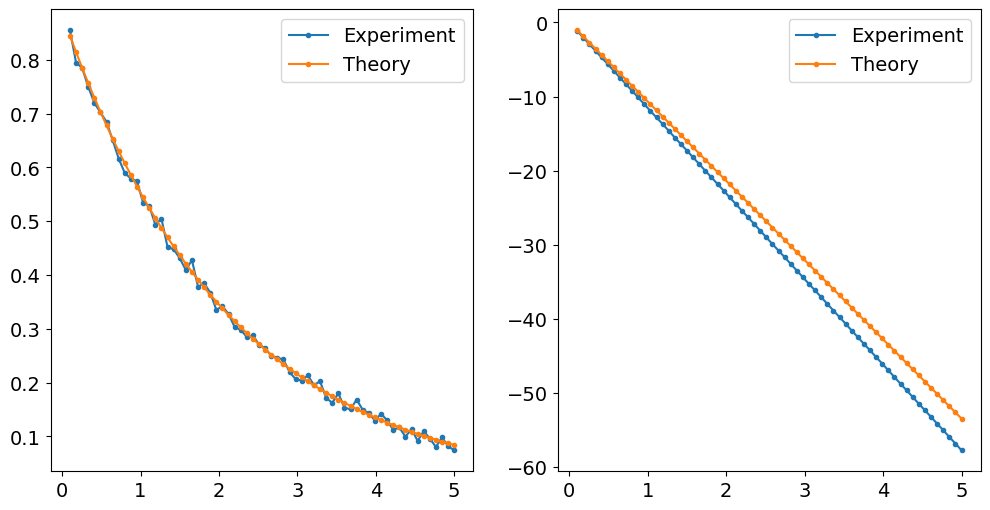

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].plot(freqs_THz, test_sample['exp_H'], ".-", label = "Experiment")
ax[0].plot(freqs_THz, best_H_values, ".-", label = "Theory")
ax[0].legend()

ax[1].plot(freqs_THz, test_sample['exp_phi'], ".-", label = "Experiment")
ax[1].plot(freqs_THz, best_phi_values, ".-", label = "Theory")
ax[1].legend()

plt.show()